In [1]:
import pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fraud.csv')

In [3]:
df.head(11)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df=df.rename(columns={'step':'Step','type':'Type','amount':'Amount','nameOrig':'Nameorig','oldbalanceOrg':'OldbalanceOrg','newbalanceOrig':'NewbalanceOrig',
                   'nameDest':'NameDest','oldbalanceDest':'OldbalanceDest',	'newbalanceDest':'NewbalanceDest',
                    'isFraud':'IsFraud','isFlaggedFraud':'IsFlaggedFraud'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Step            int64  
 1   Type            object 
 2   Amount          float64
 3   Nameorig        object 
 4   OldbalanceOrg   float64
 5   NewbalanceOrig  float64
 6   NameDest        object 
 7   OldbalanceDest  float64
 8   NewbalanceDest  float64
 9   IsFraud         int64  
 10  IsFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


CHECKING MISSING VALUES, DUPLICATED ETC.

In [6]:
df.isnull().sum()

Step              0
Type              0
Amount            0
Nameorig          0
OldbalanceOrg     0
NewbalanceOrig    0
NameDest          0
OldbalanceDest    0
NewbalanceDest    0
IsFraud           0
IsFlaggedFraud    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['IsFraud'].value_counts()

IsFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
print(df.Type.value_counts())

Type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


PLOTTING SOME OF FEATURES FOR EDA

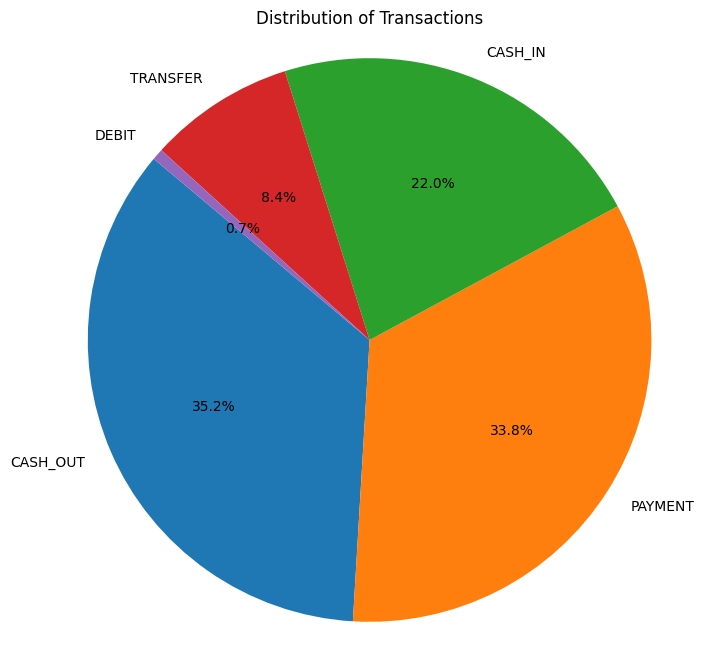

In [10]:
category_counts = df['Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Transactions')
plt.show()

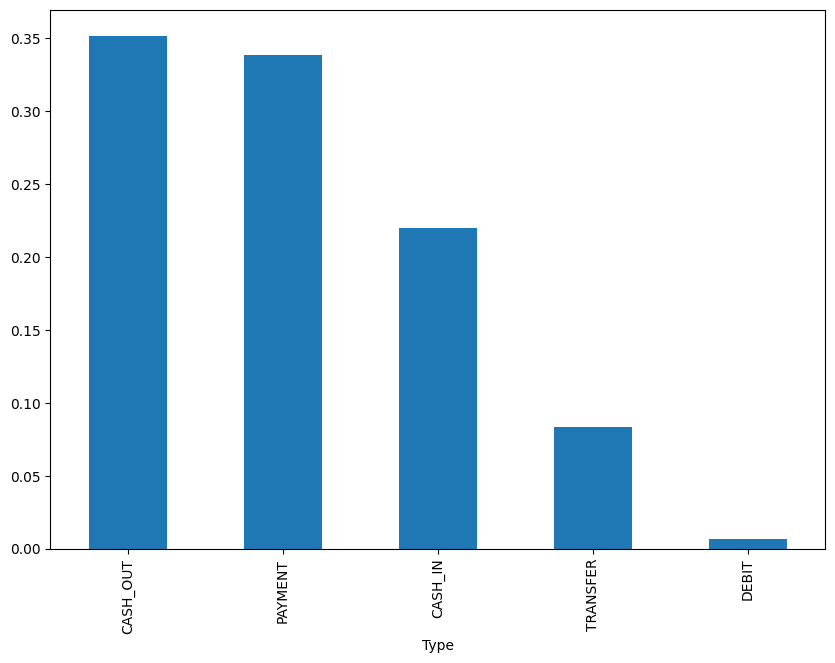

In [11]:
fig = plt.figure(figsize =(10, 7))
df['Type'].value_counts(normalize=True).plot(kind='bar')
plt.show()

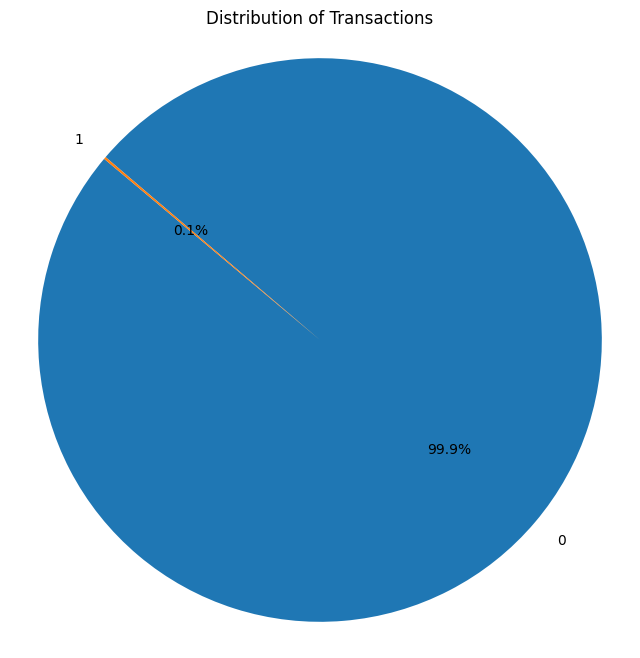

In [12]:
category_counts = df['IsFraud'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Transactions')
plt.show()

CORRELATION OF NUMERICAL FEATURES

In [13]:
df.select_dtypes(exclude=object).corr()['IsFraud'].sort_values(ascending=False)

IsFraud           1.000000
Amount            0.076688
IsFlaggedFraud    0.044109
Step              0.031578
OldbalanceOrg     0.010154
NewbalanceDest    0.000535
OldbalanceDest   -0.005885
NewbalanceOrig   -0.008148
Name: IsFraud, dtype: float64

DISTRIBUTION OF TARGET FEATURES

In [14]:
print("No Frauds:",df['IsFraud'].value_counts()[0]/len(df['IsFraud'])*100)
print("Frauds:",df['IsFraud'].value_counts()[1]/len(df['IsFraud'])*100)

No Frauds: 99.87091795518198
Frauds: 0.12908204481801522


In [15]:
corr = df.select_dtypes(exclude=object).corr()['IsFraud']

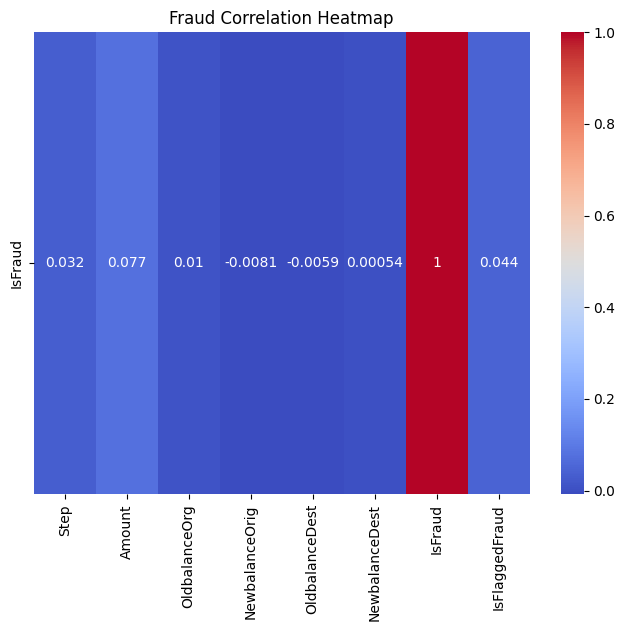

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr.to_frame().T, annot=True, cmap='coolwarm', cbar=True)
plt.title('Fraud Correlation Heatmap')
plt.show()

CORRELATIONS BETWEEN TARGET COLUMN AND FEATURES 

In [17]:
df.select_dtypes(exclude=object).corr()['IsFraud'].sort_values(ascending=False)

IsFraud           1.000000
Amount            0.076688
IsFlaggedFraud    0.044109
Step              0.031578
OldbalanceOrg     0.010154
NewbalanceDest    0.000535
OldbalanceDest   -0.005885
NewbalanceOrig   -0.008148
Name: IsFraud, dtype: float64

In [18]:
corr = df.select_dtypes(exclude=object).corr()

<Axes: >

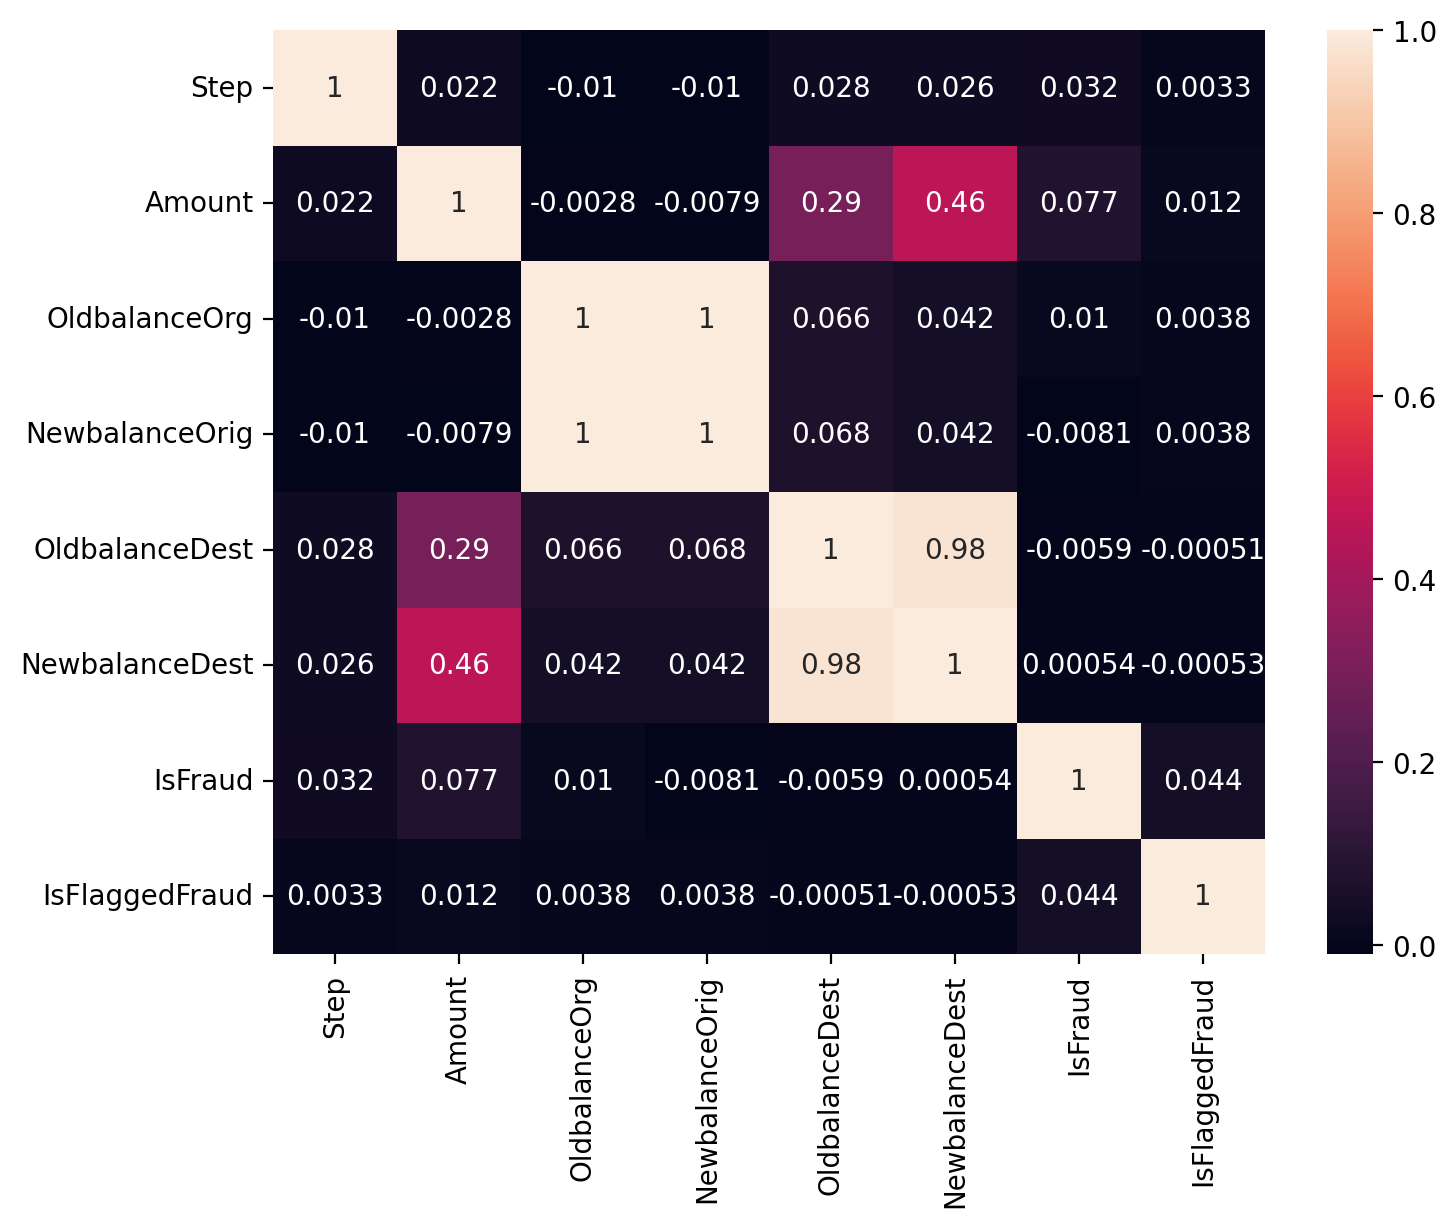

In [19]:
plt.figure(figsize=(8,6),dpi=200)
sns.heatmap(corr,annot=True)

ENCODING FEATURES

In [20]:
df = pd.get_dummies(data =df,columns = ['Type'])

df

,Step,Amount,Nameorig,OldbalanceOrg,NewbalanceOrig,NameDest,OldbalanceDest,NewbalanceDest,IsFraud,IsFlaggedFraud,Type_CASH_IN,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


LABEL ENCODING OF ID'S. 

Even though there are many unique values, keeping them in the dataset is a better approach. Maybe model can get information from the IDs of people making suspicious transactions. That's why we encode it and keep it in the dataset

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder = LabelEncoder()

df['Nameorig'] = encoder.fit_transform(df['Nameorig'])

In [23]:
df['NameDest'] = encoder.fit_transform(df['NameDest'])

In [24]:
df

,Step,Amount,Nameorig,OldbalanceOrg,NewbalanceOrig,NameDest,OldbalanceDest,NewbalanceDest,IsFraud,IsFlaggedFraud,Type_CASH_IN,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
0,1,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0,False,False,False,False,True


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score

TEST TRAIN SPLIT

In [26]:
X = df.drop('IsFraud',axis=1) 
y = df['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.25, random_state=42,stratify=y)

In [27]:
train_df = pd.concat([X_train, y_train], axis=1)

In [28]:
train_df

,Step,Amount,Nameorig,OldbalanceOrg,NewbalanceOrig,NameDest,OldbalanceDest,NewbalanceDest,IsFlaggedFraud,Type_CASH_IN,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,IsFraud
2947509,230,25106.21,3643451,50850.00,25743.79,848097,0.00,0.00,0,False,False,False,True,False,0
983137,44,226426.20,724154,3815346.61,4041772.81,387940,1206782.67,980356.47,0,True,False,False,False,False,0
2596796,208,662.24,6312603,144407.43,143745.20,1567738,0.00,0.00,0,False,False,False,True,False,0
3122557,236,128838.38,3713507,16173.00,0.00,423271,0.00,128838.38,0,False,True,False,False,False,0
5998010,426,198986.72,5771020,0.00,0.00,139036,789447.96,988434.68,0,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524870,153,1895.99,990795,0.00,0.00,1121888,0.00,0.00,0,False,False,False,True,False,0
5834821,402,347110.99,5657454,103785.00,0.00,228205,87871.75,434982.74,0,False,True,False,False,False,0
4182953,304,13259.63,4857521,0.00,0.00,1891786,0.00,0.00,0,False,False,False,True,False,0
3985280,298,24122.92,2732082,0.00,0.00,997852,0.00,0.00,0,False,False,False,True,False,0


In [ ]:
# Saving training data set

train_df.to_csv('traindata.csv')

NOTE: Our dataset contains around 8 thousand fraudulent transactions compared to over 6 million non-fraud transactions. In such cases, over/under sampling methods can be important for model performance. Undersampling rather than oversampling seems like a better approach in this very large dataset. Therefore, we are trying to obtain a better distributed train data set (proportionally) by making selections from our train data set.

PICKING FRAUD / LEGIT TRANSACTIONS BY FILTERING

In [29]:
train_fraud = train_df[df['IsFraud']==1]

/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_5477/2744804102.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_fraud = train_df[df['IsFraud']==1]


In [40]:
train_nfraud = train_df[train_df['IsFraud']==0].sample(10160)

In [41]:
train_nfraud

,Step,Amount,Nameorig,OldbalanceOrg,NewbalanceOrig,NameDest,OldbalanceDest,NewbalanceDest,IsFlaggedFraud,Type_CASH_IN,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,IsFraud
2367322,191,97278.10,2829433,6769453.44,6866731.54,510681,960914.33,863636.23,0,True,False,False,False,False,0
2965707,231,146944.15,927191,776.00,0.00,151739,0.00,146944.15,0,False,True,False,False,False,0
5187928,362,148231.92,6164191,18108.80,0.00,105670,253896.49,402128.41,0,False,True,False,False,False,0
1075927,129,184549.63,5714913,7624397.19,7808946.83,204907,8203939.35,8019389.72,0,True,False,False,False,False,0
4553057,327,430260.76,1973087,0.00,0.00,354224,830513.41,1260774.17,0,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015075,232,3743.40,1484154,893.00,0.00,1907922,0.00,0.00,0,False,False,False,True,False,0
3420622,256,42634.10,5326097,51480.00,8845.90,494680,1163993.58,1206627.68,0,False,True,False,False,False,0
2809149,225,12789.31,3585383,0.00,0.00,1609210,0.00,0.00,0,False,False,False,True,False,0
4220207,306,26559.25,4947253,0.00,0.00,1762489,0.00,0.00,0,False,False,False,True,False,0


In [42]:
trainsample = pd.concat([train_fraud, train_nfraud])

In [43]:
trainsample

,Step,Amount,Nameorig,OldbalanceOrg,NewbalanceOrig,NameDest,OldbalanceDest,NewbalanceDest,IsFlaggedFraud,Type_CASH_IN,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,IsFraud
6273165,633,4128853.75,3596829,4128853.75,0.0,490070,13982778.91,18111632.66,0,False,True,False,False,False,1
1030477,66,79441.66,3006718,79441.66,0.0,384355,0.00,0.00,0,False,False,False,False,True,1
6308242,685,47061.52,1281142,47061.52,0.0,490944,372871.76,419933.28,0,False,True,False,False,False,1
728195,37,128133.00,6094368,128133.00,0.0,87283,160395.62,288528.62,0,False,True,False,False,False,1
4388770,319,1033878.67,3561018,1033878.67,0.0,343752,0.00,0.00,0,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015075,232,3743.40,1484154,893.00,0.0,1907922,0.00,0.00,0,False,False,False,True,False,0
3420622,256,42634.10,5326097,51480.00,8845.9,494680,1163993.58,1206627.68,0,False,True,False,False,False,0
2809149,225,12789.31,3585383,0.00,0.0,1609210,0.00,0.00,0,False,False,False,True,False,0
4220207,306,26559.25,4947253,0.00,0.0,1762489,0.00,0.00,0,False,False,False,True,False,0


THE DATASET WE OBTAINED CONSISTS OF SEQUENTIAL DATA BECAUSE IT WAS OBTAINED AFTER FILTERING. BY MIXING THIS, WE FINISH OUR DATASET

In [44]:
shuffled_df = trainsample.sample(frac=1).reset_index(drop=True)

In [45]:
shuffled_df

,Step,Amount,Nameorig,OldbalanceOrg,NewbalanceOrig,NameDest,OldbalanceDest,NewbalanceDest,IsFlaggedFraud,Type_CASH_IN,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,IsFraud
0,202,260359.95,145288,0.00,0.00,479862,586934.22,847294.17,0,False,True,False,False,False,0
1,232,304050.80,695391,61146.00,365196.80,49892,539879.16,235828.36,0,True,False,False,False,False,0
2,55,854550.85,1347784,854550.85,0.00,536944,186808.48,1041359.33,0,False,True,False,False,False,1
3,277,569363.61,4942397,0.00,0.00,507607,3742568.89,4311932.51,0,False,False,False,False,True,0
4,310,2926303.83,320993,0.00,0.00,318871,3135603.84,6061907.67,0,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16315,228,4526748.52,4922689,4526748.52,0.00,490817,416831.26,4943579.77,0,False,True,False,False,False,1
16316,187,16539.21,1288968,0.00,0.00,919887,0.00,0.00,0,False,False,False,True,False,0
16317,234,602.23,6329998,0.00,0.00,63740,211543.99,212146.23,0,False,False,True,False,False,0
16318,321,39039.37,1725615,2433.00,41472.37,388010,73905.12,34865.75,0,True,False,False,False,False,0


In [46]:
shuffled_df.to_csv('shuffledtrain.csv')

In [47]:
X_train = shuffled_df.drop('IsFraud',axis=1)

In [48]:
y_train = shuffled_df['IsFraud']

MODEL SELECTION // FINDING BEST PERFORMED MODEL 

In [49]:
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    SVC()  
]

model_results = {}

for model in models:

    cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)
    
 
    mean_cv_score = round(cross_val_scores.mean() * 100, 2)
    
    model.fit(X_train, y_train)
    
    test_acc = round(model.score(X_test, y_test) * 100, 2)
    
    model_results[model] = {
        'cross_val_score': mean_cv_score,
        'test_accuracy': test_acc
    }

for model, results in model_results.items():
    print(f"{model} - Cross-Validation Score: {results['cross_val_score']}, Test Score: {results['test_accuracy']}")
    print()

/Users/harun/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/harun/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

RandomForestClassifier() - Cross-Validation Score: 98.85, Test Score: 98.89

LogisticRegression() - Cross-Validation Score: 93.95, Test Score: 96.07

KNeighborsClassifier() - Cross-Validation Score: 91.41, Test Score: 94.03

GaussianNB() - Cross-Validation Score: 79.14, Test Score: 93.83

DecisionTreeClassifier() - Cross-Validation Score: 98.68, Test Score: 99.06

SVC() - Cross-Validation Score: 88.31, Test Score: 98.94



AFTER DECIDING MODEL, LOOKING FOR BEST PARAMS

In [55]:
X = df.drop('IsFraud',axis=1) 
y = df['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.25, random_state=42,stratify=y)

In [56]:
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at each leaf node
}

# Decision Tree model
tree = DecisionTreeClassifier()

# GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score (F1):", grid_search.best_score_)

# New model with best params
best_tree = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
best_tree.fit(X_train, y_train)

# Results
y_pred = best_tree.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score (F1): 0.836800204517797
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.97      0.73      0.83      2053

    accuracy                           1.00   1590655
   macro avg       0.98      0.86      0.91   1590655
weighted avg       1.00      1.00      1.00   1590655



<Axes: >

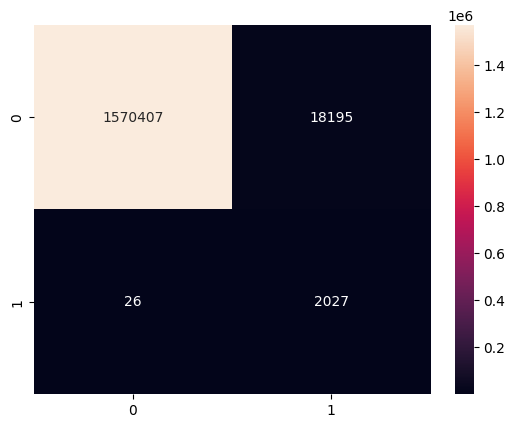

In [54]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True,fmt='d')

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4771965 entries, 2947509 to 1541412
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Step            int64  
 1   Amount          float64
 2   Nameorig        int64  
 3   OldbalanceOrg   float64
 4   NewbalanceOrig  float64
 5   NameDest        int64  
 6   OldbalanceDest  float64
 7   NewbalanceDest  float64
 8   IsFlaggedFraud  int64  
 9   Type_CASH_IN    bool   
 10  Type_CASH_OUT   bool   
 11  Type_DEBIT      bool   
 12  Type_PAYMENT    bool   
 13  Type_TRANSFER   bool   
dtypes: bool(5), float64(5), int64(4)
memory usage: 386.8 MB


NEURAL NETWORK MODEL

In [57]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
import tensorflow as tf
from keras.metrics import Precision,Recall,F1Score

/Users/harun/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [63]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [65]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

#Building model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Model fitting
model.fit(X_train, y_train, epochs=50, batch_size=32)

#Metrics,results
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5)

Epoch 1/50
149124/149124 [==============================] - 63s 422us/step - loss: 0.0053 - accuracy: 0.9990
Epoch 2/50
149124/149124 [==============================] - 64s 429us/step - loss: 0.0035 - accuracy: 0.9993
Epoch 3/50
149124/149124 [==============================] - 63s 423us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 4/50
149124/149124 [==============================] - 87s 587us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 5/50
149124/149124 [==============================] - 89s 594us/step - loss: 0.0027 - accuracy: 0.9995
Epoch 6/50
149124/149124 [==============================] - 65s 435us/step - loss: 0.0026 - accuracy: 0.9995
Epoch 7/50
149124/149124 [==============================] - 64s 428us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 8/50
149124/149124 [==============================] - 64s 429us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 9/50
149124/149124 [==============================] - 64s 428us/step - loss: 0.0024 - accuracy: 0.9995
Epoch 10/50
149124/

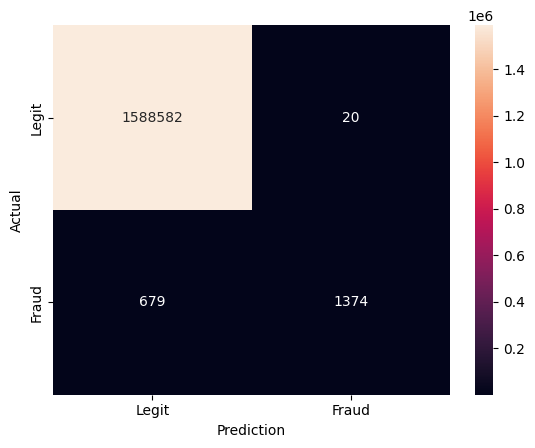

In [71]:
cm = confusion_matrix(y_test,y_pred_binary)
sns.heatmap(cm,annot=True,xticklabels=['Legit', 'Fraud'],
yticklabels=['Legit', 'Fraud'],fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [68]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.99      0.67      0.80      2053

    accuracy                           1.00   1590655
   macro avg       0.99      0.83      0.90   1590655
weighted avg       1.00      1.00      1.00   1590655



ADDING ANOTHER HIDDEN LAYER TO MONITOR PERFORM

Epoch 1/15
298248/298248 [==============================] - 161s 538us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 2/15
298248/298248 [==============================] - 168s 564us/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 3/15
298248/298248 [==============================] - 160s 536us/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 4/15
298248/298248 [==============================] - 161s 540us/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 5/15
298248/298248 [==============================] - 160s 536us/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 6/15
298248/298248 [==============================] - 160s 536us/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 7/15
298248/298248 [==============================] - 160s 536us/step - loss: 0.00

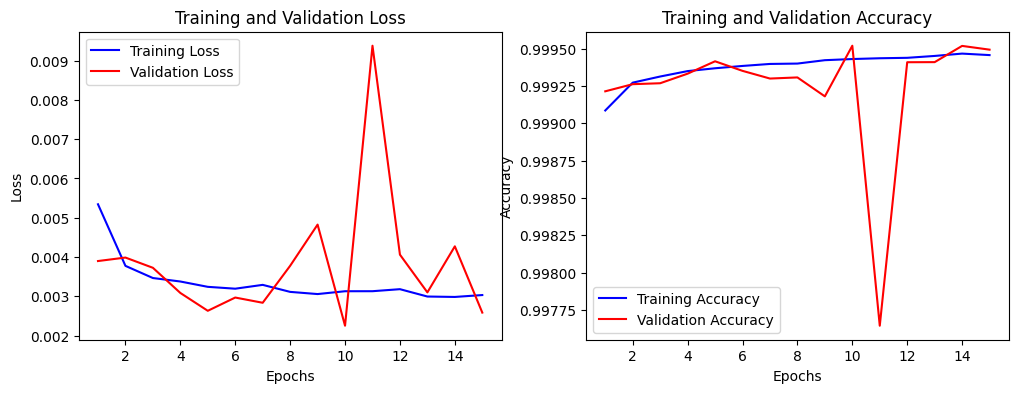

In [72]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# To save model's history creating a record

history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test))

# Logging Loss info
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Metrics
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Training prosses chart
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

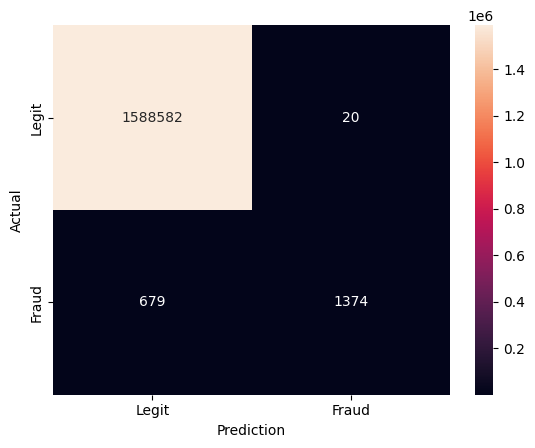

In [73]:
cm = confusion_matrix(y_test,y_pred_binary)
sns.heatmap(cm,annot=True,xticklabels=['Legit', 'Fraud'],
yticklabels=['Legit', 'Fraud'],fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [74]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.99      0.67      0.80      2053

    accuracy                           1.00   1590655
   macro avg       0.99      0.83      0.90   1590655
weighted avg       1.00      1.00      1.00   1590655

